### Problem 3  (simple function approximation)
#### Duarte Balata (46304) e Miguel Oliveira (55772)

We start by importing the required libraries.
- **Numpy**: used for algebraic operations;
- **Matplotlib**: used for data visualization;
- **SKLearn**: used to split the dataset and obtain some performance statistics;
- **Keras**: main Machine Learning library, used to implement the MLP;

In [8]:
# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense

We then use the numpy random.uniform method to generate 200 pseudo-random values between 0 and 2pi (one period of the sin function). These points are stored in the random_x variable.

By applying the sin function to the generated points, we obtain the corresponding y values, that are stored on the variable random_y.

These points are plotted in the following graph.

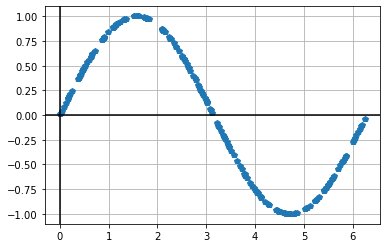

In [5]:
random_x = []
random_y = []

for i in range(0,200):
    random_val = np.random.uniform(0,2*np.pi)
    random_x.append(random_val)
    random_y.append(np.sin(random_val))
    
plt.plot(random_x, random_y,'p')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

Having generated the 200 data points, we then divide the dataset into 3 smaller sub datasets:

- The **training set**, which is used to train the models.
- The **validation set**, used for model evaluation and hyperparameter tuning.
- The **test set**, used to obtain the performance metrics of the final NN model.

Text(0.5, 1.0, 'Test set')

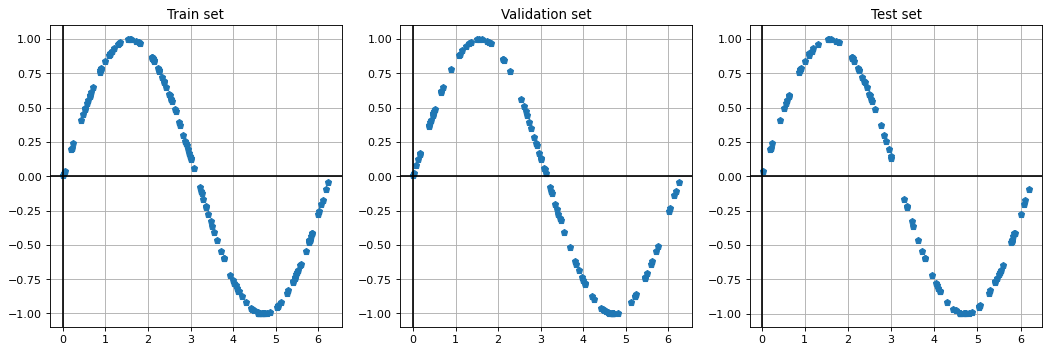

In [6]:
X_train, X_test, y_train, y_test = train_test_split(random_x, random_y, test_size=0.30, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(random_x, random_y, test_size=0.50, random_state=1)


figure(num=None, figsize=(16, 5), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(1, 3, 1)    
plt.plot(X_train, y_train,'p')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Train set', color='black')

plt.subplot(1, 3, 2) 
plt.plot(X_val, y_val,'p')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Validation set', color='black')

plt.subplot(1, 3, 3) 
plt.plot(X_test, y_test,'p')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.title('Test set', color='black')

We then use the Keras library to create a Multilayer Perceptron.

In order to so, we start by initializing an object belonging to the **Sequential()** class. Then by using the method **.add**, it is possible to insert sequential layers of neurons into our network.

We start by defining the input layer dimension when adding the first layer. This dimension consists of a single neuron, since our input dataset consists of a single-dimension tuple of values.

We also define that the first (and only) hidden layer is initially composed by 5 neurons. Finally, we have the output layer, which is also composed by a single neuron.

The error function used by the backpropagation of error algorithm in order to adjust the weights of the NN is set to **mean_squared_error**. This metric is also used to access the model's performance.

The optimization algorithm is set do **Adam**, one the most widely used and computanionally efficient NN optimization algorithms.

After some trial and error, we verified that the model achieved higher perfomances when the activation function of the hidden layer was set to **tahn** and the one on the output layer set to **linear**. The tanh function varies in the [-1;1] interval (similarly to the sin function), as such there is no need to perform further scaling adjustements to our dataset.

Then, with the epoch value set to 1000, we start by iteratively testing the effect of batch size on performance by setting values between 2 and 10.

We come to the conclusion that smaller batch sizes are assossiated with higher performances. However the lower the batch size, the higher the toll it takes on performance, since more iterations are needed to complete a learning epoch. Moreover, by using lower batch sizes, the optimization process is more likely to get stuck on a local gradient minimum, which is not desirable.

In order to account for that, we compromised by setting the batch size to 5, which results in good model performances without taking a big toll on execution time.

batch_size = 2 mean_squared_error = 0.006470419256830538
batch_size = 3 mean_squared_error = 0.04231751819680522
batch_size = 4 mean_squared_error = 0.043827281246726725
batch_size = 5 mean_squared_error = 0.048509777923747575
batch_size = 6 mean_squared_error = 0.047094618565685344
batch_size = 7 mean_squared_error = 0.05252046388407403
batch_size = 8 mean_squared_error = 0.04894758393747132
batch_size = 9 mean_squared_error = 0.055542760458995824
batch_size = 10 mean_squared_error = 0.0735470212978047


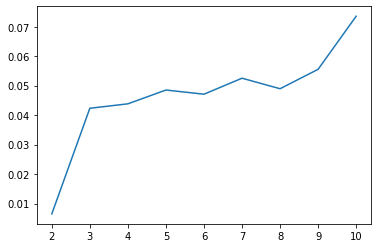

In [13]:
index = []
score_list = []

for i in range(2,11):
    
    model = Sequential()
    model.add(Dense(5, input_dim=1, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mean_squared_error', optimizer="adam", metrics=['mean_squared_error'])

    model.fit(X_train, y_train, epochs=1000, batch_size=5, verbose=0)

    predicted_points = model.predict(X_val)
    
    score = metrics.mean_squared_error(predicted_points,y_val)
    
    index.append(i)
    score_list.append(score)
    
    print("batch_size =", str(i), "mean_squared_error =", str(score))

plt.plot(index, score_list)

Having set the batch size, we then iteratively optimize for the number of neurons in the hidden layer, by varying the value to numbers between 2 and 9.

It is possible to observe that 7 or 9 neurons in the hidden layer result in the best model performances.

Ultimately, we decide to set the number of neurons in the hidden layer to 7, since this quantity of neurons results in a low error value, while causing the less significant increase in the complexity of the network.

neurons = 2 mean_squared_error = 0.028369582729838888
neurons = 3 mean_squared_error = 0.003165269673421468
neurons = 4 mean_squared_error = 0.0325410737125869
neurons = 5 mean_squared_error = 0.03378125810524874
neurons = 6 mean_squared_error = 0.03252308597309859
neurons = 7 mean_squared_error = 0.0014642261883640701
neurons = 8 mean_squared_error = 0.034024883438979366
neurons = 9 mean_squared_error = 0.001204609014267604


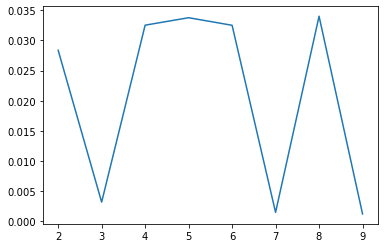

In [14]:
index = []
score_list = []

for i in range(2,10):
    
    model = Sequential()
    model.add(Dense(i, input_dim=1, activation='tanh'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

    model.fit(X_train, y_train, epochs=1000, batch_size=5, verbose=0)

    predicted_points = model.predict(X_val)
    
    score = metrics.mean_squared_error(predicted_points,y_val)
    
    index.append(i)
    score_list.append(score)
    
    print("neurons =", str(i), "mean_squared_error =", str(score))

plt.plot(index, score_list)

Finally, we optimize for the number of epochs needed to reach a low error value, by varying the epoch number between 100 and 2000, with steps of 100.

By observing the plotted error value by number of epochs, it's possible to notice that a plateau is reached at 1500 epochs. For this reason, in order not to increase the runtime too much, we decided to train the final model for 1500 epochs.

epochs = 100 mean_squared_error = 0.10775053618496967
epochs = 200 mean_squared_error = 0.057209016223097306
epochs = 300 mean_squared_error = 0.04712193969949132
epochs = 400 mean_squared_error = 0.02712112972604535
epochs = 500 mean_squared_error = 0.03934245549738461
epochs = 600 mean_squared_error = 0.03833608927453916
epochs = 700 mean_squared_error = 0.03842156420315677
epochs = 800 mean_squared_error = 0.007316521314728065
epochs = 900 mean_squared_error = 0.002976344729826147
epochs = 1000 mean_squared_error = 0.035560343235096076
epochs = 1100 mean_squared_error = 0.004466027520193311
epochs = 1200 mean_squared_error = 0.003981099968834833
epochs = 1300 mean_squared_error = 0.0005538494704783854
epochs = 1400 mean_squared_error = 0.03269718310841912
epochs = 1500 mean_squared_error = 0.00019688691889540135
epochs = 1600 mean_squared_error = 0.0001442803149624457
epochs = 1700 mean_squared_error = 0.00013393040786895168
epochs = 1800 mean_squared_error = 0.00015717491301144314


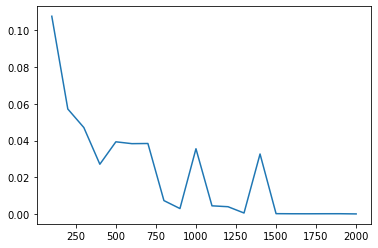

In [22]:
index = []
score_list = []

for i in range(100, 2100, 100):
    
    model = Sequential()
    model.add(Dense(7, input_dim=1, activation='tanh'))
    model.add(Dense(1, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

    model.fit(X_train, y_train, epochs=i, batch_size=5, verbose=0)

    predicted_points = model.predict(X_val)
    
    score = metrics.mean_squared_error(predicted_points,y_val)
    
    index.append(i)
    score_list.append(score)
    
    print("epochs =", str(i), "mean_squared_error =", str(score))

plt.plot(index, score_list)

By doing so, it is possible to observe that our prediction resulted in an extremely close aproximation of the sin function, with the training points being predicted with a mean squared error value of 0.0001.

In [24]:
model = Sequential()
model.add(Dense(7, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer="adam", metrics=['mean_squared_error'])

model.fit(X_train, y_train, epochs=1500, batch_size=5, verbose=0)

predicted_points = model.predict(X_test)

score = metrics.mean_squared_error(predicted_points,y_test)

print("mean_squared_error = ", str(score))

mean_squared_error =  0.00018420312492332166


Finally, we plot the train set overlaying the sin function curve (on the left), next to the plot with the values predicted by the NN based on the training set (on the right).

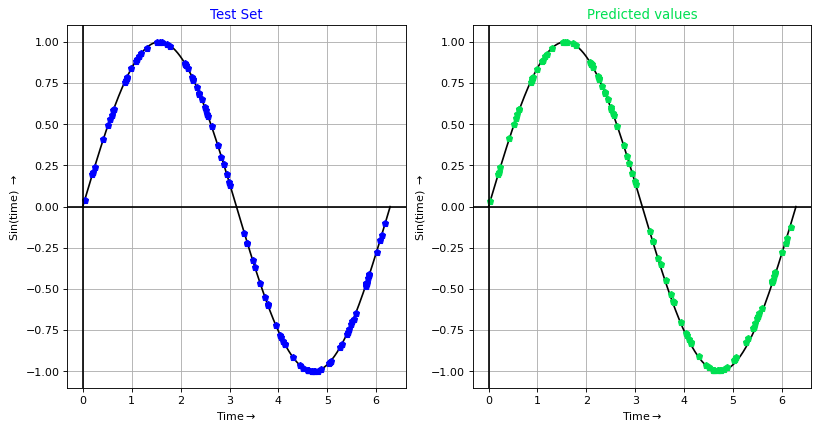

In [25]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

# Generating time data using arange function from numpy
time = np.arange(0, 2*np.pi, 0.001)

# Finding amplitude at each time
amplitude = np.sin(time)

plt.subplot(1, 2, 1)
plt.plot(time, amplitude, color="black")
plt.plot(X_test, y_test,'p',color="b")
plt.title('Test Set', color='b')
plt.xlabel('Time'+ r'$\rightarrow$')
plt.ylabel('Sin(time) '+ r'$\rightarrow$')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.subplot(1, 2, 2)
plt.plot(time, amplitude, color="black")
plt.plot(X_test, predicted_points,'p',color="#00e052")
plt.title('Predicted values', color='#00e052')
plt.xlabel('Time'+ r'$\rightarrow$')
plt.ylabel('Sin(time) '+ r'$\rightarrow$')
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Finally displaying the plot
plt.show()